In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Define project root and data path directly
PROJECT_ROOT = r"C:\Users\nirma\Cruise_ship_Perfomance"
DATA_PATH = os.path.join(PROJECT_ROOT, 'data', 'data.csv')

# Add project root to Python path
sys.path.append(PROJECT_ROOT)

# Import after adding to path
from src.data.loader import load_data

# Load the dataset
df = load_data(DATA_PATH)

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 44 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Start Time                            210240 non-null  object 
 1   End Time                              210240 non-null  object 
 2   Vessel Name                           210240 non-null  object 
 3   Power Galley 1 (MW)                   210224 non-null  float64
 4   Power Galley 2 (MW)                   210224 non-null  float64
 5   Power Service (MW)                    210222 non-null  float64
 6   HVAC Chiller 1 Power (MW)             210033 non-null  float64
 7   HVAC Chiller 2 Power (MW)             210033 non-null  float64
 8   HVAC Chiller 3 Power (MW)             210033 non-null  float64
 9   Scrubber Power (MW)                   210224 non-null  float64
 10  Sea Temperature (Celsius)             210224 non-null 

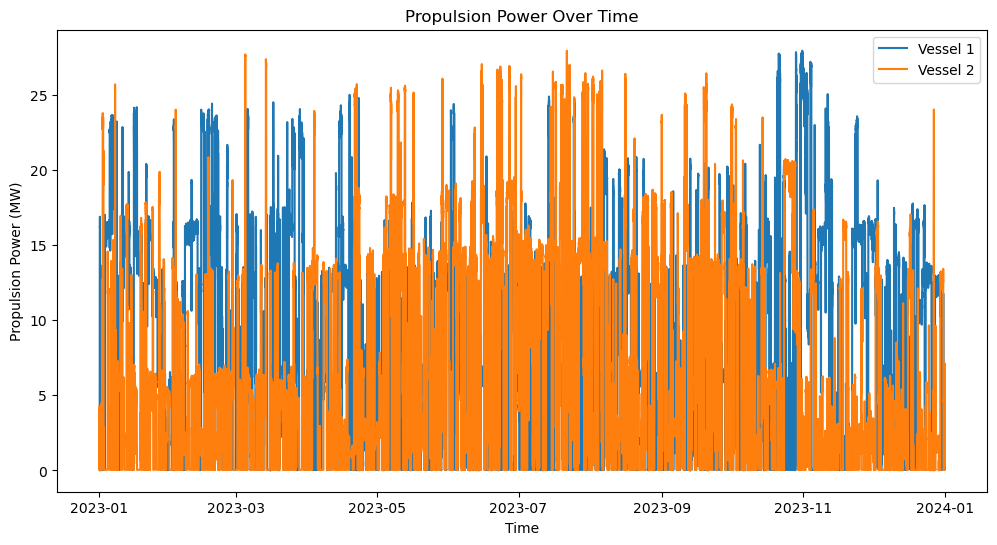

In [13]:
# Convert timestamps to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])

# Visualize propulsion power over time for each vessel
plt.figure(figsize=(12, 6))
for vessel in df['Vessel Name'].unique():
    vessel_df = df[df['Vessel Name'] == vessel]
    plt.plot(vessel_df['Start Time'], vessel_df['Propulsion Power (MW)'], label=vessel)
plt.title('Propulsion Power Over Time')
plt.xlabel('Time')
plt.ylabel('Propulsion Power (MW)')
plt.legend()
plt.savefig('../reports/figures/propulsion_power_time.png')
plt.show()

In [14]:
# Save exploration summary
with open('../reports/exploration_summary.txt', 'w') as f:
    f.write("Dataset Info:\n")
    f.write(str(df.info()) + "\n\n")
    f.write("Missing Values:\n")
    f.write(str(df.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 44 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Start Time                            210240 non-null  datetime64[ns]
 1   End Time                              210240 non-null  datetime64[ns]
 2   Vessel Name                           210240 non-null  object        
 3   Power Galley 1 (MW)                   210224 non-null  float64       
 4   Power Galley 2 (MW)                   210224 non-null  float64       
 5   Power Service (MW)                    210222 non-null  float64       
 6   HVAC Chiller 1 Power (MW)             210033 non-null  float64       
 7   HVAC Chiller 2 Power (MW)             210033 non-null  float64       
 8   HVAC Chiller 3 Power (MW)             210033 non-null  float64       
 9   Scrubber Power (MW)                   210224 non-null  floa